This notebook is used to analyze training dynamics. In order to first train neural networks and collect training dynamics, 
* run "python generate_dataset.py" to generate 1D sine wave dataset.
* run "python sine.py" in terminal
* be sure to change to your sweeping parameters around line 500 in sine.py
* results are saved in the folder "./results/sine"

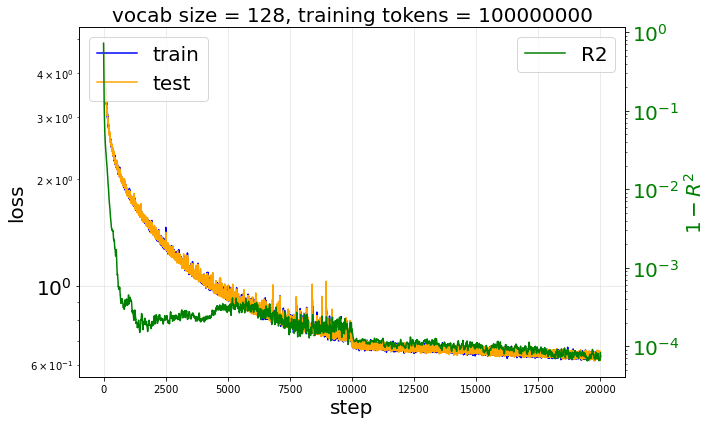

In [1]:
import matplotlib.pyplot as plt
import numpy as np

seed = 1
n_layer = 2
n_head = 1
n_embd = 32
vocab_size = 128 #7000
num_trajectories = 1000000

loaded = np.load(f'./results/sine/results_seed_{seed}_vocabsize_{vocab_size}_num_trajectories_{num_trajectories}_n_embd_{n_embd}_n_layer_{n_layer}_n_head_{n_head}.npz')
loaded_results = {key: loaded[key] for key in loaded.keys()}

# Create figure and first axis (left)
fig, ax1 = plt.subplots(figsize=(10, 6))

font_size = 20

# Plot losses on left axis (linear scale)
ax1.plot(loaded_results['losses'], label='losses', color='blue')
ax1.plot(loaded_results['losses_test'], label='losses_test', color='orange')
ax1.set_xlabel('step', fontsize=font_size)
ax1.set_ylabel('loss', color='black', fontsize=font_size)
ax1.tick_params(axis='y', labelcolor='black', labelsize=font_size)
ax1.set_yscale('log')
ax1.legend(['train', 'test'], loc='upper left', fontsize=font_size)
ax1.grid(True, alpha=0.3)
#ax1.set_xscale('log')

# Create second axis (right) for R2
ax2 = ax1.twinx()
ax2.plot(1-loaded_results['R2s'], label='R2', color='green')
ax2.set_ylabel(r'$1 - R^2$', color='green', fontsize=font_size)
ax2.set_yscale('log')  # Log scale for R2
ax2.tick_params(axis='y', labelcolor='green', labelsize=font_size)
ax2.legend(loc='upper right', fontsize=font_size)
plt.title('vocab size = {}, training tokens = {}'.format(vocab_size, 100 * num_trajectories), fontsize=font_size)

plt.tight_layout()
plt.savefig('./plots/app1/vocab_size_{}_num_trajectories_{}.png'.format(vocab_size, 100 * num_trajectories), dpi=300, bbox_inches='tight')



In [2]:
np.max(loaded_results['R2s'])

0.9999508186619224

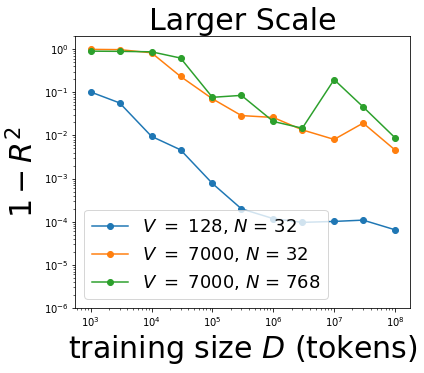

In [35]:
num_trajectories_sizes = np.array([10, 30, 100, 300, 1000, 3000, 10**4, 3 * 10**4,  10**5, 3* 10**5, 10**6])
seed = 1
n_layer = 2
n_head = 1
n_embd = 32
vocab_size = 7000

R2s_V_7000_embd_32 = []
for num_trajectories in num_trajectories_sizes:
    loaded = np.load(f'./results/sine/results_seed_{seed}_vocabsize_{vocab_size}_num_trajectories_{num_trajectories}_n_embd_{n_embd}_n_layer_{n_layer}_n_head_{n_head}.npz')
    loaded_results = {key: loaded[key] for key in loaded.keys()}
    R2s_V_7000_embd_32.append(np.max(loaded_results['R2s']))


seed = 1
n_layer = 2
n_head = 1
n_embd = 768
vocab_size = 7000

R2s_V_7000_embd_768 = []
for num_trajectories in num_trajectories_sizes:
    loaded = np.load(f'./results/sine/results_seed_{seed}_vocabsize_{vocab_size}_num_trajectories_{num_trajectories}_n_embd_{n_embd}_n_layer_{n_layer}_n_head_{n_head}.npz')
    loaded_results = {key: loaded[key] for key in loaded.keys()}
    R2s_V_7000_embd_768.append(np.max(loaded_results['R2s']))

seed = 1
n_layer = 2
n_head = 1
n_embd = 32
vocab_size = 128

R2s_V_128_embd_32 = []
for num_trajectories in num_trajectories_sizes:
    loaded = np.load(f'./results/sine/results_seed_{seed}_vocabsize_{vocab_size}_num_trajectories_{num_trajectories}_n_embd_{n_embd}_n_layer_{n_layer}_n_head_{n_head}.npz')
    loaded_results = {key: loaded[key] for key in loaded.keys()}
    R2s_V_128_embd_32.append(np.max(loaded_results['R2s']))

plt.figure(figsize=(6, 5))

plt.plot(100*num_trajectories_sizes, 1-np.array(R2s_V_128_embd_32), marker='o')
plt.plot(100*num_trajectories_sizes, 1-np.array(R2s_V_7000_embd_32), marker='o')
plt.plot(100*num_trajectories_sizes, 1-np.array(R2s_V_7000_embd_768), marker='o')
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'training size $D$ (tokens)', fontsize=30)
plt.ylabel(r'$1-R^2$', fontsize=30)
plt.legend([r'$V\ = $'+f' 128, $N$ = 32', r'$V\ = $'+f' 7000, $N$ = 32', r'$V\ = $'+f' 7000, $N$ = 768'], fontsize=18, loc='lower left')
plt.ylim(1e-6,2)
plt.title(r'Larger Scale', fontsize=30)
plt.savefig('./plots/sine_R2_scaling_real.png', dpi=300, bbox_inches='tight')


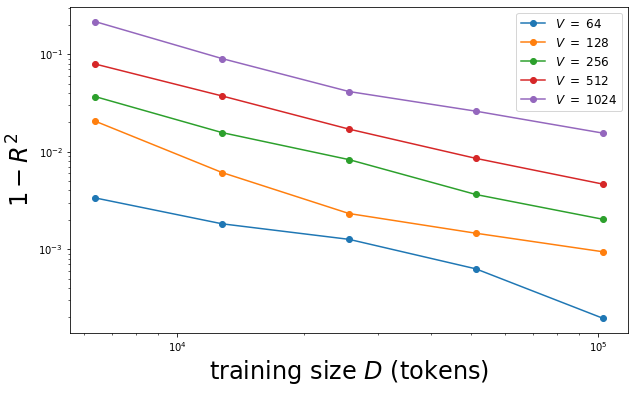

In [9]:
import numpy as np
import matplotlib.pyplot as plt

D = num_trajectories_sizes = np.array([64, 128, 256, 512, 1024])
V = vocab_sizes = [64, 128, 256, 512, 1024]
seed = 1
n_embd = 32
n_layer = 2
n_head = 1

R2ss = []

for vocab_size in vocab_sizes:
    R2s = []
    for num_trajectories in num_trajectories_sizes:
        loaded = np.load(f'./results/sine/results_seed_{seed}_vocabsize_{vocab_size}_num_trajectories_{num_trajectories}_n_embd_{n_embd}_n_layer_{n_layer}_n_head_{n_head}.npz')
        loaded_results = {key: loaded[key] for key in loaded.keys()}
        R2s.append(np.max(loaded_results['R2s']))
    R2ss.append(R2s)

R2ss = np.array(R2ss)

plt.figure(figsize=(10, 6))
for i in range(len(R2ss)):
    plt.plot(100*num_trajectories_sizes, 1 - np.array(R2ss[i]), marker='o')

plt.xlabel(r'training size $D$ (tokens)', fontsize=24)
plt.ylabel(r'$1-R^2$', fontsize=24)
plt.legend([r'$V\ = $'+f' {vocab_size}' for vocab_size in vocab_sizes], fontsize=12, loc='upper right')
plt.xscale('log')
plt.yscale('log')


Fitted parameters:
A = 2.571496e-03 ± 7.663351e-04
alpha = 1.328039 ± 0.038535
beta = 1.152128 ± 0.032592

Model: 1 - R² = 2.571496e-03 * V^1.328039 * D^(-1.152128)

R² of the fit: 0.995420


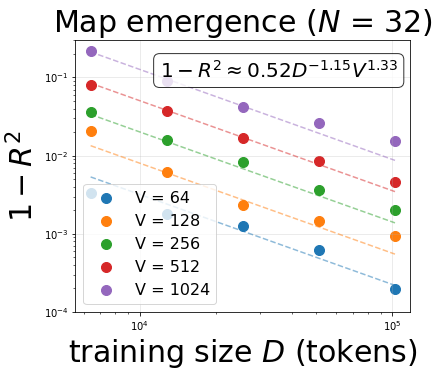

In [26]:
# Fit D/V to 1-R2 such that 1-R2 = A * V^alpha * D^(-beta)
from scipy.optimize import curve_fit

# Prepare data for fitting
# Flatten the 2D arrays to 1D for fitting
V_flat = []
D_flat = []
one_minus_R2_flat = []

for i, vocab_size in enumerate(vocab_sizes):
    for j, num_trajectories in enumerate(num_trajectories_sizes):
        V_flat.append(vocab_size)
        D_flat.append(num_trajectories)
        one_minus_R2_flat.append(1 - R2ss[i, j])

V_flat = np.array(V_flat)
D_flat = np.array(D_flat)
one_minus_R2_flat = np.array(one_minus_R2_flat)

# Define the power law model: 1 - R2 = A * V^alpha * D^(-beta)
def power_law_model(params, V, D):
    A, alpha, beta = params
    return A * (V ** alpha) * (D ** (-beta))

# Wrapper function for curve_fit (it expects function of (x, *params))
def model_func(data, A, alpha, beta):
    V, D = data
    return A * (V ** alpha) * (D ** (-beta))

# Initial guess for parameters
initial_guess = [1.0, 1.0, 1.0]

# Fit the model
# curve_fit expects data to be passed as (V, D) tuple
popt, pcov = curve_fit(model_func, (V_flat, D_flat), one_minus_R2_flat, 
                       p0=initial_guess, maxfev=10000)

A, alpha, beta = popt

# Calculate parameter uncertainties
param_errors = np.sqrt(np.diag(pcov))

print(f"Fitted parameters:")
print(f"A = {A:.6e} ± {param_errors[0]:.6e}")
print(f"alpha = {alpha:.6f} ± {param_errors[1]:.6f}")
print(f"beta = {beta:.6f} ± {param_errors[2]:.6f}")
print(f"\nModel: 1 - R² = {A:.6e} * V^{alpha:.6f} * D^(-{beta:.6f})")

# Calculate R² of the fit
predicted = model_func((V_flat, D_flat), A, alpha, beta)
ss_res = np.sum((one_minus_R2_flat - predicted) ** 2)
ss_tot = np.sum((one_minus_R2_flat - np.mean(one_minus_R2_flat)) ** 2)
r2_fit = 1 - (ss_res / ss_tot)
print(f"\nR² of the fit: {r2_fit:.6f}")

# Plot the fit
plt.figure(figsize=(6, 5))


for i, vocab_size in enumerate(vocab_sizes):
    plt.scatter(100*num_trajectories_sizes, 1 - R2ss[i], 
               label=f'V = {vocab_size}', marker='o', s=100)
    # Plot fitted curve for this V
    D_plot = np.logspace(np.log10(num_trajectories_sizes.min()), 
                        np.log10(num_trajectories_sizes.max()), 100)
    y_fit = A * (vocab_size ** alpha) * (D_plot ** (-beta))
    plt.plot(100*D_plot, y_fit, '--', alpha=0.5)

plt.xlabel(r'training size $D$ (tokens)', fontsize=30)
plt.ylabel(r'$1-R^2$', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=16, loc='lower left')
plt.grid(True, alpha=0.3)
plt.title(r'Map emergence ($N$ = 32)', fontsize=30)

plt.text(12000, 0.1, r'$1-R^2$' + r'$\approx 0.52 D^{-1.15} V^{1.33}$', fontsize=20,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.8))

plt.ylim(1e-4, 0.3)

plt.savefig('./plots/sine_emergent_scaling_V_D.png', dpi=300, bbox_inches='tight')

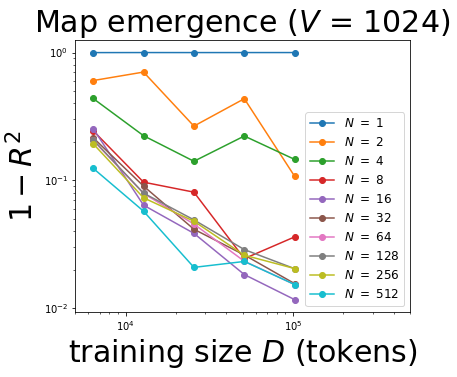

In [33]:
import numpy as np
import matplotlib.pyplot as plt

D = num_trajectories_sizes = np.array([64, 128, 256, 512, 1024])
W = embedding_sizes = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
seed = 1
vocab_size = 1024
n_layer = 2
n_head = 1

R2ss = []

n_existing = 0


for n_embd in embedding_sizes:
    R2s = []
    for num_trajectories in num_trajectories_sizes:
        loaded = np.load(f'./results/sine/results_seed_{seed}_vocabsize_{vocab_size}_num_trajectories_{num_trajectories}_n_embd_{n_embd}_n_layer_{n_layer}_n_head_{n_head}.npz')
        loaded_results = {key: loaded[key] for key in loaded.keys()}
        R2s.append(np.max(loaded_results['R2s']))
        n_existing += 1
    R2ss.append(R2s)

R2ss = np.array(R2ss)

plt.figure(figsize=(6, 5))
for i in range(len(R2ss)):
    plt.plot(100*num_trajectories_sizes, 1 - np.array(R2ss[i]), marker='o')

plt.title(r'Map emergence ($V$ = 1024)', fontsize=30)

plt.xlabel(r'training size $D$ (tokens)', fontsize=30)
plt.ylabel(r'$1-R^2$', fontsize=30)
plt.legend([r'$N\ = $'+f' {embedding_size}' for embedding_size in embedding_sizes], fontsize=12, loc='lower right')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e3, 5e5)

plt.savefig('./plots/sine_emergent_scaling_N_D.png', dpi=300, bbox_inches='tight')

In [61]:
n_existing

46

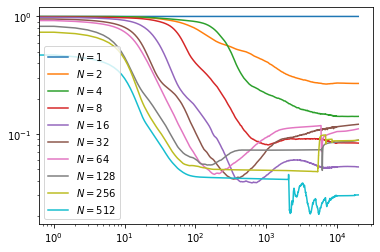

In [101]:
# embed, step

D = 256

seed = 1
vocab_size = 1024
n_layer = 2
n_head = 1
n_embd = 32
Ns = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

for n in Ns:
    data = np.load(f'./results/sine/results_seed_{seed}_vocabsize_{vocab_size}_num_trajectories_{D}_n_embd_{n}_n_layer_{n_layer}_n_head_{n_head}.npz')
    plt.plot(1-data['R2s'])
plt.yscale('log')
plt.xscale('log')
plt.legend([f'$N = {n}$' for n in Ns])